# L2-B - Linear Quantization I: Get the Scale and Zero Point

In this lesson, continue to learn about fundamentals of linear quantization, and implement your own Linear Quantizer.

Run the next cell to import all of the functions you have used before in the previous lesson(s) of `Linear Quantization I` to follow along with the video.

- To access the `helper.py` file, you can click `File --> Open...`, on the top left.

In [1]:
import torch

from helper import linear_q_with_scale_and_zero_point, linear_dequantization, plot_quantization_errors

### a dummy tensor to test the implementation
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

## Finding `Scale` and `Zero Point` for Quantization

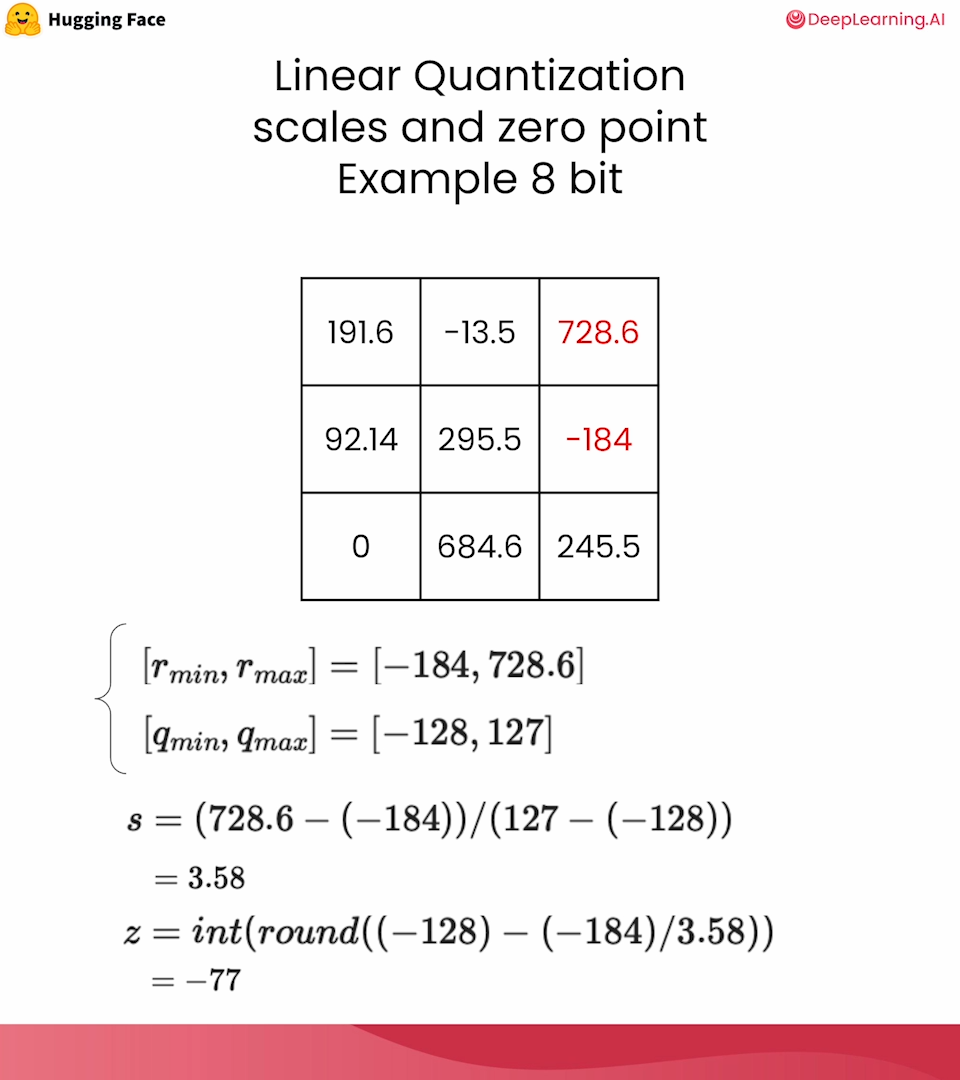

In [2]:
q_min = torch.iinfo(torch.int8).min
q_max = torch.iinfo(torch.int8).max

print("q_min :",q_min,"q_max :",q_max)

q_min : -128 q_max : 127


In [3]:
# r_min = test_tensor.min()
r_min = test_tensor.min().item()
r_max = test_tensor.max().item()

print("r_min :",r_min, "r_max :", r_max)

r_min : -184.0 r_max : 728.5999755859375


In [4]:
scale = (r_max - r_min) / (q_max - q_min)
zero_point = q_min - (r_min / scale)

print("scale :",scale,"zero_point :",zero_point)

scale : 3.578823433670343 zero_point : -76.58645490333825


In [5]:
zero_point = int(round(zero_point))
print("zero_point :",zero_point)

zero_point : -77


- Now, put all of this in a function.

In [6]:
def get_q_scale_and_zero_point(tensor, dtype=torch.int8):
    
    q_min, q_max = torch.iinfo(dtype).min, torch.iinfo(dtype).max
    r_min, r_max = tensor.min().item(), tensor.max().item()

    scale = (r_max - r_min) / (q_max - q_min)

    zero_point = q_min - (r_min / scale)

    # clip the zero_point to fall in [quantized_min, quantized_max]
    if zero_point < q_min:
        zero_point = q_min
    elif zero_point > q_max:
        zero_point = q_max
    else:
        # round and cast to int
        zero_point = int(round(zero_point))
    
    return scale, zero_point

- Test the implementation using the `test_tensor` defined earlier.
```Python
[[191.6, -13.5, 728.6],
 [92.14, 295.5,  -184],
 [0,     684.6, 245.5]]
```

In [7]:
new_scale, new_zero_point = get_q_scale_and_zero_point(
    test_tensor)

print("New scale :",new_scale)
print("New ero point :", new_zero_point)

New scale : 3.578823433670343
New ero point : -77


## Quantization and Dequantization with Calculated `Scale` and `Zero Point`

- Use the calculated `scale` and `zero_point` with the functions `linear_q_with_scale_and_zero_point` and `linear_dequantization`.

In [8]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    test_tensor, new_scale, new_zero_point)

In [9]:
dequantized_tensor = linear_dequantization(quantized_tensor,
                                           new_scale, new_zero_point)

- Plot to see how the Quantization Error looks like after using calculated `scale` and `zero_point`.

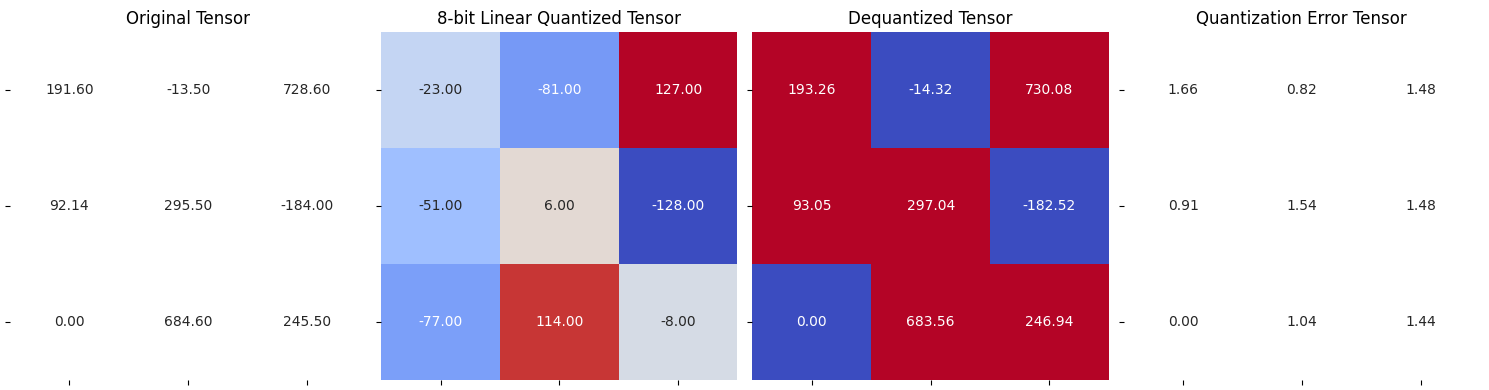

In [10]:
plot_quantization_errors(test_tensor, quantized_tensor, 
                         dequantized_tensor)

In [11]:
(dequantized_tensor-test_tensor).square().mean()

tensor(1.5730)